<a href="https://colab.research.google.com/github/rooncal/Image-Segmentation/blob/main/TGS_Salt_Identification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


#Getting data files

In [8]:
uploaded = files.upload()
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -q -c tgs-salt-identification-challenge
!mkdir data
!mv train.zip flamingo.zip competition_data.zip test.zip depths.csv train.csv sample_submission.csv data
!unzip -q data/competition_data.zip

Saving kaggle.json to kaggle.json


In [50]:
df = pd.read_csv("competition_data/train.csv")
df.head(10)

,id,rle_mask
0,2c45b152f1,99 3 197 6 295 9 395 10 494 12 594 13 694 14 7...
1,3cb59a4fdc,1 5656
2,e185ab5dc1,4647 2 4748 10 4849 18 4950 25 5051 29 5152 34...
3,c78c89577c,101 1
4,6306dd3a8e,1 30 102 29 203 29 304 28 405 27 506 27 607 26...
5,aae8971d6e,6664 3 6765 3 6866 3 6967 3 7068 3 7169 3 7267...
6,b80db32c01,NaN
7,164873b51f,NaN
8,e335542c17,1 2828 2834 96 2936 95 3040 92 3142 91 3244 90...
9,db840e1e22,505 1 605 2 705 3 805 4 905 5 1005 6 1106 6 12...


In [65]:
depths_pd = pd.read_csv('competition_data/depths.csv')
depths_pd.head(3)

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305


##Data cleaning

In [52]:
df['rle_mask'] = df['rle_mask'].fillna("0 10201")

##Visualizing the data

In [53]:
def rleToMask(rleString,height,width):
  rows,cols = height,width
  rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
  rlePairs = np.array(rleNumbers).reshape(-1,2)
  img = np.zeros(rows*cols,dtype=np.uint8)
  for index,length in rlePairs:
    index -= 1
    img[index:index+length] = 255
  img = img.reshape(cols,rows)
  img = img.T
  return img

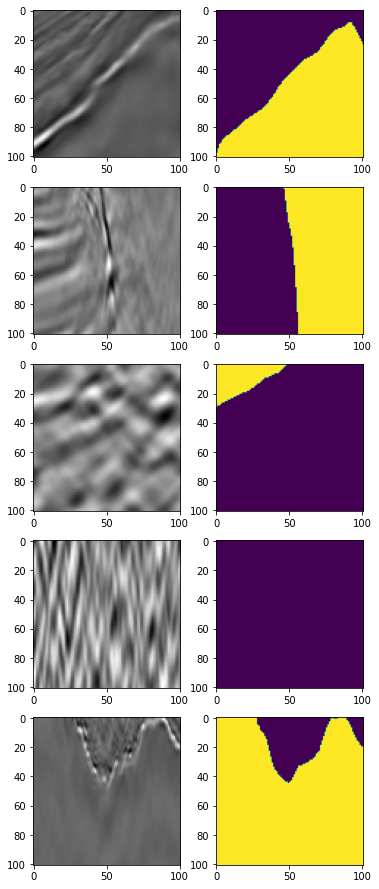

In [64]:
fig = plt.figure(figsize=(6,32))
for index in range(0,10,2):
  fig.add_subplot(10,2,index+1)
  img = Image.open(f'competition_data/train/images/{df["id"][index]}.png')
  plt.imshow(img)
  fig.add_subplot(10,2,index+2)
  plt.imshow(rleToMask(df["rle_mask"][index],101,101))